In [350]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms as T
import torchvision
from tqdm import tqdm
import random
import numpy as np
from collections import OrderedDict

from PIL import Image, ImageDraw, ImageFont

from matplotlib import pyplot as plt

In [351]:
from pathlib import Path
root = Path("original_captchas")

## Helpers

In [352]:
def show_batch(x,y,shape = None):
    """
    input: 
        x(Tensor[num_images, rows, columns]): images tensor
        y(array): labels
        shape(tuple): (rows,col) 
    output:
        grid of smaple images
    """

    if not shape:
        shape = (int(x.shape[0]**0.5), int(x.shape[0]**0.5))

    fig, axs = plt.subplots(nrows= shape[0], ncols=shape[1], figsize = (12,8))
    index = 0
    for row in axs:
        for ax in row:
            ax.imshow(x[index])
            ax.set_xlabel(y[index], )
            index+=1

    # plt.subplots_adjust(wspace = 0.2, hspace = 0.5) 
    fig.tight_layout()
    plt.show()

In [170]:
chars = ["-"]
phrases =[]
for p in root.glob("*.png"):
    print(Image.open(p).size)
    phrases.append(p.name.split(".")[0])
    chars.extend(list(p.name.split(".")[0]))
chars = "".join(chars)

(116, 40)
(116, 40)
(116, 40)
(116, 40)
(116, 40)
(116, 40)
(116, 40)
(116, 40)
(116, 40)
(116, 40)
(116, 40)
(116, 40)
(116, 40)
(116, 40)
(116, 40)
(116, 40)
(116, 40)
(116, 40)
(116, 40)
(116, 40)
(116, 40)
(116, 40)
(116, 40)
(116, 40)
(116, 40)
(116, 40)
(116, 40)
(116, 40)
(116, 40)
(116, 40)
(116, 40)
(116, 40)
(116, 40)
(116, 40)
(116, 40)
(116, 40)
(116, 40)
(116, 40)
(116, 40)
(116, 40)
(116, 40)
(116, 40)
(116, 40)
(116, 40)
(116, 40)
(116, 40)
(116, 40)
(116, 40)
(116, 40)
(116, 40)
(116, 40)
(116, 40)
(116, 40)
(116, 40)
(116, 40)
(116, 40)
(116, 40)
(116, 40)
(116, 40)
(116, 40)
(116, 40)
(116, 40)
(116, 40)
(116, 40)
(116, 40)
(116, 40)
(116, 40)
(116, 40)
(116, 40)
(116, 40)
(116, 40)
(116, 40)
(116, 40)
(116, 40)
(116, 40)
(116, 40)
(116, 40)
(116, 40)
(116, 40)
(116, 40)
(116, 40)
(116, 40)
(116, 40)
(116, 40)
(116, 40)
(116, 40)
(116, 40)
(116, 40)
(116, 40)
(116, 40)
(116, 40)
(116, 40)
(116, 40)
(116, 40)
(116, 40)
(116, 40)
(116, 40)
(116, 40)
(116, 40)
(116, 40)


In [171]:
phrases[:10]

['桥', '书', '锅', '口哨', '电视', '口红', '烟斗', '手表', '红绿灯', '轮胎']

In [172]:
chars[:10]

'-桥书锅口哨电视口红'

In [173]:
font_paths = ["ttf/Fangsong.ttf", "ttf/Kaiti.ttf"]

In [174]:
position_dict = {1 : [44], 2:[15,73],3:[8, 44, 80],4:[1, 30, 59, 88], 5: [1,24,48,72,96]}

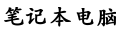

In [175]:
 def drawText(pos, txt,font,image, fill):
        draw = ImageDraw.Draw(image)
        draw.text(pos, txt, font=font, fill=fill)
        del draw

bgColor = (255, 255, 255)
fontColor = (0, 0, 0)
image = Image.new('RGB', (116,40), bgColor)
str_ = "笔记本电脑"
font_path = random.choice(font_paths)
for word, x_position in zip(str_,position_dict[len(str_)]):
    word_img =  Image.new('RGB', (30,30), bgColor)
    font = ImageFont.truetype(font_path, 22)
    drawText((0,2), word, font, word_img, (0,0,0))
    image.paste(word_img, (x_position,0))
image

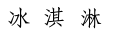

In [176]:
bgColor = (255, 255, 255)
fontColor = (0, 0, 0)
image = Image.new('RGB', (116,40), bgColor)
str_ = "冰淇淋"
font_path = random.choice(font_paths)
for word, x_position in zip(str_,position_dict[len(str_)]):
    word_img =  Image.new('RGB', (30,30), bgColor)
    font = ImageFont.truetype(font_path, 22)
    drawText((0,2), word, font, word_img, (0,0,0))
    image.paste(word_img, (x_position,0))
image

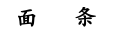

In [177]:
bgColor = (255, 255, 255)
fontColor = (0, 0, 0)
image = Image.new('RGB', (116,40), bgColor)
str_ = "面条"
font_path = random.choice(font_paths)
for word, x_position in zip(str_,position_dict[len(str_)]):
    word_img =  Image.new('RGB', (30,30), bgColor)
    font = ImageFont.truetype(font_path, 22)
    drawText((0,2), word, font, word_img, (0,0,0))
    image.paste(word_img, (x_position,0))
image

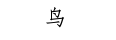

In [178]:
bgColor = (255, 255, 255)
fontColor = (0, 0, 0)
image = Image.new('RGB', (116,40), bgColor)
str_ = "鸟"
font_path = random.choice(font_paths)
for word, x_position in zip(str_,position_dict[len(str_)]):
    word_img =  Image.new('RGB', (30,30), bgColor)
    font = ImageFont.truetype(font_path, 22)
    drawText((0,2), word, font, word_img, (0,0,0))
    image.paste(word_img, (x_position,0))
image

## Hyper-parameters

In [180]:
BATCH_SIZE = 32
NUM_EPOCHS = 10
LEARNING_RATE = 0.001
RANDOM_SEED = 42

DEVICE = torch.device("cuda: 0" if torch.cuda.is_available() else "cpu")

## Dataset

In [181]:
class CaptchaDataset(Dataset):
    
    def __init__(self, chars, phrases, font_paths, train, transforms ,position_dict, image_size = (116,40),size = 1000):
        super(CaptchaDataset, self).__init__()
        self.chars = chars
        
        self.char2index = {char:index for char, index in zip(self.chars, range(len(self.chars)))}
        
        self.phrases = phrases
        self.size = 1000
        self.font_paths = font_paths
        self.train = train
        self.transforms = transforms

        self.image_size = image_size
        self.position_dict = position_dict

        self.input_length = 5
        self.strs_set = []

        for i in range(self.size):
            length =random.randint(1,5)
            str_ = "".join(random.choices(self.chars, k=length))
            self.strs_set.append(str_)
        
        for i in range(self.size):
            for str_ in self.phrases:
                self.strs_set.append(str_)
            
        random.shuffle(self.strs_set)
            

    def __len__(self):
        return self.size * 2
    
    def drawText(self, pos, txt,font,image, fill):
        draw = ImageDraw.Draw(image)
        draw.text(pos, txt, font=font, fill=fill)
        del draw
    
    def __getitem__(self, index):
        str_ = self.strs_set[index]
        target_length = len(str_)
        
        bgColor = (255, 255, 255)
        fontColor = (0, 0, 0)
        image = Image.new('RGB', self.image_size, bgColor)
        font_path = random.choice(self.font_paths)

        for word, x_position in zip(str_,self.position_dict[target_length]):
            word_img =  Image.new('RGB', (30,30), bgColor)
            font = ImageFont.truetype(font_path, 22)
            drawText((0,2), word, font, word_img, (0, 0,0))

            if self.train:
                word_img = self.transforms(word_img)
            
            image.paste(word_img, (x_position,5))
        
        image = T.functional.to_tensor(image)
        
        
        
        input_length = torch.full(size=(1,), fill_value=self.input_length, dtype=torch.long)
        target_length = torch.full(size=(1,), fill_value= target_length, dtype=torch.long)
        target = torch.tensor([self.char2index[x] for x in str_])
        return image, target, input_length, target_length  
    

transforms = T.Compose([T.Resize(100),
                        T.RandomRotation(30),
                        T.RandomResizedCrop(size = 30,scale=(0.8, 1.0)),
                        ])

In [182]:
dataset = CaptchaDataset(chars, phrases,font_paths, train = True,transforms = transforms, position_dict = position_dict)

In [183]:
torch.cat([torch.tensor([1,2]),torch.tensor([1,2,3])], dim = 0)

tensor([1, 2, 1, 2, 3])

In [184]:
def collate_fn(batch):
    images = [batch[i][0] for i in range(len(batch))]
    image_tensor = torch.stack(images, dim = 0)
    
    targets = [batch[i][1] for i in range(len(batch))]
    target_tensor = torch.cat(targets, dim = 0)
    
    
    input_lengths = [batch[i][2] for i in range(len(batch))]
    input_length_tensor = torch.cat(input_lengths, dim = 0)
    
    target_lengths = [batch[i][3] for i in range(len(batch))]
    target_length_tensor = torch.cat(target_lengths, dim = 0)
    
#     image, target, input_length, target_length  = batch
    return image_tensor,target_tensor,input_length_tensor,target_length_tensor

In [307]:
transforms = T.Compose([T.Resize(100),
                        T.RandomRotation(30,fill=(255,255,255)),
                        T.RandomResizedCrop(size = 30,scale=(0.8, 1.0))])
train_dataset = CaptchaDataset(chars, phrases,font_paths, train = True, transforms = transforms, position_dict = position_dict, size=2000)
val_dataset = CaptchaDataset(chars, phrases,font_paths, train = True, transforms = transforms, position_dict = position_dict, size=50)


train_dataloader = DataLoader(dataset = train_dataset,
                             batch_size=BATCH_SIZE,
                             collate_fn = collate_fn,
                             shuffle=True)

val_dataloader = DataLoader(dataset = val_dataset,
                             batch_size=BATCH_SIZE,
                             collate_fn = collate_fn,
                             shuffle=False)

dataset_loader = {"train": train_dataloader, "val": val_dataloader}

In [308]:
image, target, input_length, target_length = next(iter(train_dataloader))

In [309]:
image.shape, target.shape, input_length.shape, target_length.shape

(torch.Size([32, 3, 40, 116]),
 torch.Size([68]),
 torch.Size([32]),
 torch.Size([32]))

In [310]:
target

tensor([274,  58,  59, 252, 253, 254, 263, 264,  27,  28, 244, 245, 262, 199,
        200, 134, 135, 214, 274, 216, 265, 266, 285,  10,  11,  77, 123, 191,
        192,  14,  15, 202,  51,  52,  53,  69, 287,  96,  97, 243,  77, 172,
        173,  51,  52,  53, 199,   7, 296, 270, 271, 277, 287,  74,  75, 251,
         18,  29,  30,  80, 138, 139, 273, 167, 237, 238,  42,  43])

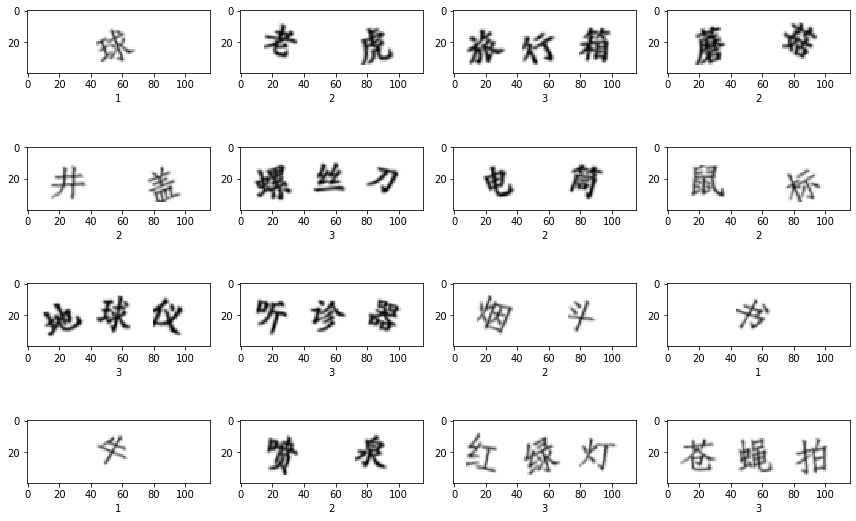

In [311]:
show_batch(image.permute([0,2,3,1]), target_length.numpy(), (4,4))

## model

In [349]:
base_model = torchvision.models.resnet18(pretrained=True)
for index, (name, layer) in enumerate(base_model.named_children()):
    print(index, name, " -> ", layer)
    print("--"* 40)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /Users/ZRC/.cache/torch/checkpoints/resnet18-5c106cde.pth


KeyboardInterrupt: 

In [342]:
class Model(nn.Module):
    def __init__(self, n_classes, input_shape=(3, 40, 116)):
        super(Model, self).__init__()
        self.input_shape = input_shape
        
        base_model = torchvision.models.resnet34(pretrained=True)
#         for param in base_model.parameters():
#             param.requires_grad = False 
        base_model_layers = list(self.base_model.children()) 
        self.cnn = torch.nn.Sequential(*base_model_layers[:9])

        self.lstm = nn.LSTM(input_size=self.infer_features(), hidden_size=128, num_layers=2, bidirectional=True)
        self.fc = nn.Linear(in_features=256, out_features=n_classes)
    
    def infer_features(self):
        x = torch.zeros((1,)+self.input_shape)
        x = self.cnn(x)
        x = x.reshape(x.shape[0], -1, x.shape[-1])
        return x.shape[1]

    def forward(self, x):
        x = self.cnn(x)
        x = x.reshape(x.shape[0], -1, x.shape[-1])
        x = F.adaptive_avg_pool2d(x,output_size = (256,5))
        x = x.permute(2, 0, 1)
        x, _ = self.lstm(x)
        x = self.fc(x)
        return x

In [343]:
torch.tensor(np.random.rand(32,12,37)).argmax(dim=-1).shape

torch.Size([32, 12])

In [344]:
model = Model(n_classes=len(chars))
inputs = torch.zeros((32, 3, 40, 116))
outputs = model(inputs)
outputs.shape

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /Users/ZRC/.cache/torch/checkpoints/resnet18-5c106cde.pth


URLError: <urlopen error [Errno 8] nodename nor servname provided, or not known>

In [333]:
model

Model(
  (cnn): Sequential(
    (conv11): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (bn11): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu11): ReLU(inplace=True)
    (conv12): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (bn12): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu12): ReLU(inplace=True)
    (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (conv21): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (bn21): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu21): ReLU(inplace=True)
    (conv22): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (bn22): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu22): ReLU(inplace=True)
    (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilati

## decode

In [334]:
def decode(sequence):
    a = ''.join([chars[x] for x in sequence])
    s = ''.join([x for j, x in enumerate(a[:-1]) if x != chars[0] and x != a[j+1]])
    if len(s) == 0:
        return ''
    if a[-1] != chars[0] and s[-1] != a[-1]:
        s += a[-1]
    return s

def decode_target(sequence):
    return ''.join([chars[x] for x in sequence]).replace(' ', '')

def calc_acc(target,target_lengths, output):
    output_argmax = output.detach().permute(1, 0, 2).argmax(dim=-1)
    target = target.cpu().numpy()
    output_argmax = output_argmax.cpu().numpy()
    
    
    decoded_ = decode_target(target)    
    index = 0
    decoded_strs = []
    for num in target_lengths:
        decoded_strs.append(decoded_[index: index+num])
        index = index+num
        
    a = np.array([true == decode(pred) for true, pred in zip(decoded_strs, output_argmax)])
    return a.mean()

## Train

In [335]:
def train(model, optimizer, epoch, dataloader):
    model.train()
    loss_mean = 0
    acc_mean = 0
    with tqdm(dataloader) as pbar:
        for batch_index, (data, target, input_lengths, target_lengths) in enumerate(pbar):
            data, target = data, target

            optimizer.zero_grad()
            output = model(data)

            output_log_softmax = F.log_softmax(output, dim=-1)
            loss = F.ctc_loss(output_log_softmax, target, input_lengths, target_lengths)

            loss.backward()
            optimizer.step()

            loss = loss.item()
            acc = calc_acc(target,target_lengths,output)

            if batch_index == 0:
                loss_mean = loss
                acc_mean = acc

            loss_mean = 0.1 * loss + 0.9 * loss_mean
            acc_mean = 0.1 * acc + 0.9 * acc_mean

            pbar.set_description(f'Epoch: {epoch} Loss: {loss_mean:.4f} Acc: {acc_mean:.4f} ')

def valid(model, optimizer, epoch, dataloader):
    model.eval()
    with tqdm(dataloader) as pbar, torch.no_grad():
        loss_sum = 0
        acc_sum = 0
        for batch_index, (data, target, input_lengths, target_lengths) in enumerate(pbar):
            data, target = data, target
            
            output = model(data)
            output_log_softmax = F.log_softmax(output, dim=-1)
            loss = F.ctc_loss(output_log_softmax, target, input_lengths, target_lengths)
            
            loss = loss.item()        
            acc = calc_acc(target,target_lengths,output)
            
            loss_sum += loss
            acc_sum += acc
            
            loss_mean = loss_sum / (batch_index + 1)
            acc_mean = acc_sum / (batch_index + 1)
            
            pbar.set_description(f'Test : {epoch} Loss: {loss_mean:.4f} Acc: {acc_mean:.4f} ')

In [336]:
optimizer = torch.optim.Adam(model.parameters(), 1e-3, amsgrad=True)
epochs = 10
for epoch in range(1, epochs + 1):
    train(model, optimizer, epoch, dataset_loader["train"])
    valid(model, optimizer, epoch, dataset_loader["val"])

Epoch: 4 Loss: 4.0726 Acc: 0.0097 :  68%|██████▊   | 43/63 [00:56<00:26,  1.32s/it]


KeyboardInterrupt: 

## 测试模型输出

In [ ]:
model.eval()
do = True
while do or decode_target(target) == decode(output_argmax[0]):
    do = False
    image, target, input_length, label_length = dataset[0]
    print('true:', decode_target(target))

    output = model(image.unsqueeze(0).cuda())
    output_argmax = output.detach().permute(1, 0, 2).argmax(dim=-1)
    print('pred:', decode(output_argmax[0]))
to_pil_image(image)